# Pittsburgh's Best Neighborhood
GROUP888's Choice based on income, education, and fire incidents.

Leo Tuckey [email], Joe Wang [jow188@pitt.edu], David Shi [dzs19@pitt.edu]

## Metrics
We chose income in the past 12 months, fire incidents, and education rate as our three metrics to determine the best neighborhood in Pittsburgh. 
* Income often corresponds to better schools, lower crime, safer areas, higher quality of life, and other positive features.
* Fire incidents ...
* More people who are enrolled in school means a more academic-oriented environment for one's children.

We also tried to use a dataset on air pollution, but we had a difficult time trying to connect the neighborhoods on the map to the neighborhoods we knew by name.

Now, let's import the libraries that we will use.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Income

Here is the link to the dataset: https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/d159c6b3-f70a-439b-bd2b-0cb8735d76d4

Let's read that in and sort it by the income statistic from the past 12 months, called "Estimate; Total:"

In [24]:
overall = pd.read_csv("income.csv")
overall = overall.sort_values("Estimate; Total:", ascending = False)
overall.head()

,_id,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income
68,69,Shadyside,69,7484.0,360.919659,6134.0,363.641307,1350.0,210.563530
77,78,Squirrel Hill South,78,7211.0,332.601864,4999.0,315.486925,2212.0,249.801922
13,14,Brookline,14,5843.0,327.694980,4545.0,329.622511,1298.0,185.297059
9,10,Bloomfield,10,4571.0,205.494525,3724.0,206.458228,847.0,126.960624
53,54,Mount Washington,54,4385.0,249.523546,3274.0,245.878019,1111.0,160.215480


* We are now going to remove the unused columns. They are other data points on how much people made with or without other income sources like military benefits. We chose to consider all forms of income since money is money regardless of whether it came from a job or a retirement plan.

In [25]:
neighByTotal = overall[['Neighborhood', 'Estimate; Total:']]
neighByTotal.head()

,Neighborhood,Estimate; Total:
68,Shadyside,7484.0
77,Squirrel Hill South,7211.0
13,Brookline,5843.0
9,Bloomfield,4571.0
53,Mount Washington,4385.0


* It's worth mentioning here that the dataset does not provide the actual value of income. We can safely assume that the average person is not making on average 7k a year in Shadyside. It is likely that each "Estimate; Total" is multiplied by 10; however, we do not know for sure. That being said, we do not really need the actual number. We have verified that Shadyside and Squirrel Hill are wealthy neighborhoods, meaning that at least the ranking is correct comparatively. Since this is a comparative ranking, that comparative correctness is most important.

* Now, let's graph the dataset to see how the neighborhoods compare.

Text(0, 0.5, 'Neighborhood')

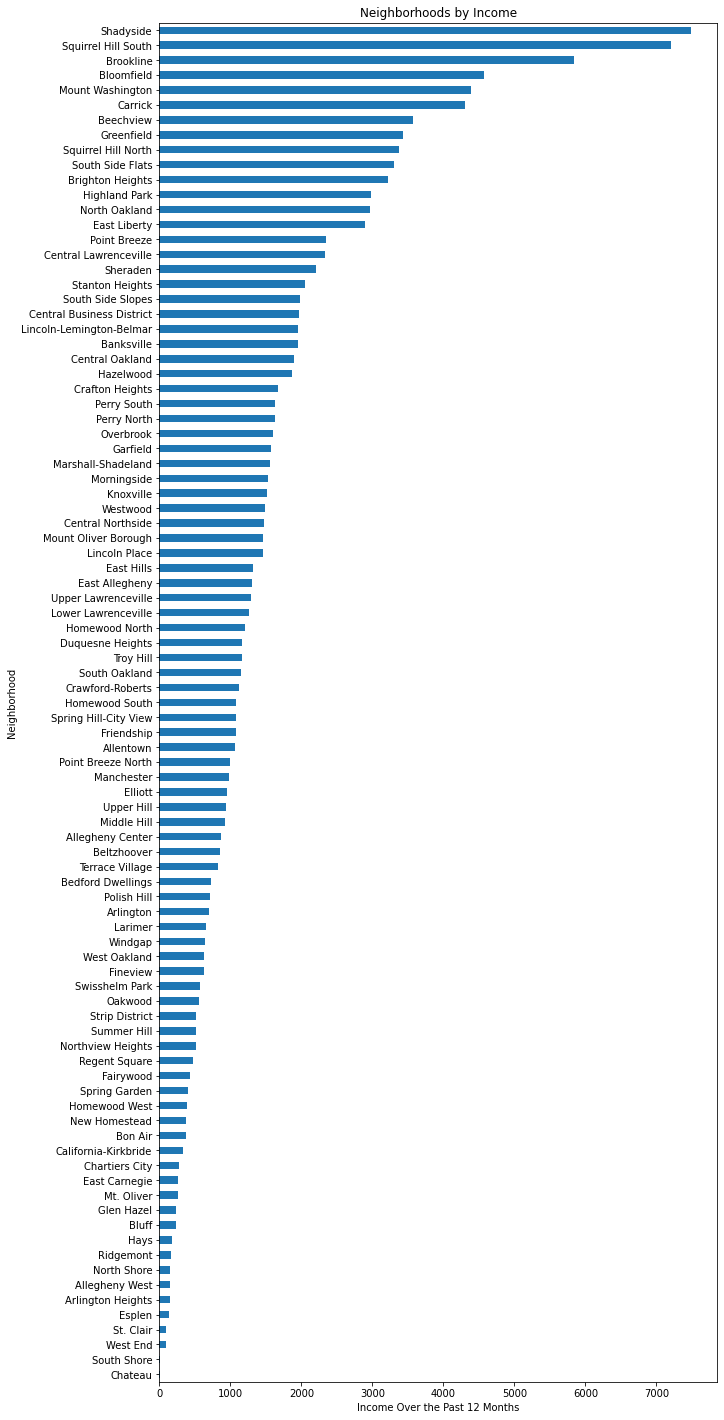

In [26]:
neighByTotal = neighByTotal.sort_values("Estimate; Total:",ascending = True)
neighByTotal.plot.barh(x = "Neighborhood",y="Estimate; Total:", legend = None, figsize = (10,25))
plt.title('Neighborhoods by Income')
plt.xlabel('Income Over the Past 12 Months')
plt.ylabel("Neighborhood")

* As demonstrated by the graph, Shadyside (SS), Squirrel Hill South (SHS), and Brookline stand out from the rest. While SS and SHS are close in income, they both surpass every other neighborhood by at least 1000, and Brookline surpasses the others excluding the former two by over 1000 as well. This shows that SS and SHS are the best neighborhoods by this metric with the next best being Brookline.

### Fire Incidents

The link to the dataset: 
https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh/resource/8d76ac6b-5ae8-4428-82a4-043130d17b02
https://data.wprdc.org/dataset/2020-census-redistricting-data-extracts

When choosing a neighborhood, considering fire incidents is essential as they reflect the area's safety and quality of life.
    
High fire frequencies may suggest safety risks, including outdated infrastructure or insufficient fire prevention measures. The presence of an efficient and responsive fire department is crucial for ensuring safety and protecting property. Additionally, fire incidents can influence insurance premiums, with higher rates in areas with more frequent fires.


In [1]:
import pandas as pd

file_path_fire_incidents = '/home/jupyter-jow188/Big-Ideas-Final-Project/FireIncidents.csv'
file_path_population = '/home/jupyter-jow188/Big-Ideas-Final-Project/Population.csv'

fire_incidents_data = pd.read_csv(file_path_fire_incidents)
population_data = pd.read_csv(file_path_population)


#### Metric
The metric we used was the ratio of the number of people in each neighborhood to the number of fire incidents. We used a dataset containing all fire incidents in Pittsburgh and a dataset containing the number of residents in all Pittsburgh neighborhoods.

In [4]:
missing_values_fire = fire_incidents_data.isnull().sum()
missing_values_population = population_data.isnull().sum()

missing_values_fire, missing_values_population

(_id                         0
 call_no                     0
 incident_type              18
 type_description            0
 address                     0
 alarms                      0
 alarm_time                 18
 primary_unit                5
 census_tract              592
 neighborhood             1398
 council_district         1364
 ward                     1399
 tract                     851
 public_works_division    1398
 pli_division             1399
 police_zone              1400
 fire_zone                  10
 latitude                  925
 longitude                 925
 dtype: int64,
 Neighborhood                                                                       0
 2010_Total_Population                                                              0
 2010_OneRace_Population                                                            0
 2010_White_Alone_Population                                                        0
 2010_Black_Alone_Population                        

Clean the Fire Incidents Data. Keep only rows where both latitude and longitude are not missing and overview of the cleaned data again.

In [5]:
cleaned_fire_data = fire_incidents_data.dropna(subset=['latitude', 'longitude'])

cleaned_fire_data.head(), cleaned_fire_data.isnull().sum()

(   _id     call_no  incident_type             type_description  \
 0    1  F160029985          111.0                Building fire   
 1    2  F180022058          111.0                Building fire   
 3    4  F170043431          131.0       Passenger vehicle fire   
 4    5  F180021111          111.0                Building fire   
 5    6  F180021782          150.0  Outside rubbish fire, Other   
 
                                        address  alarms           alarm_time  \
 0    800 BLOCK CENTER ST, WILKINSBURG PA 15221       1  2016-04-21T05:01:04   
 1     1100 BLOCK JANE ST, WILKINSBURG PA 15221       1  2018-03-13T08:34:43   
 3   1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212       0  2017-05-31T08:39:47   
 4   2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205       1  2018-03-09T10:26:42   
 5  S 7TH ST & E CARSON ST, PITTSBURGH PA 15203       0  2018-03-12T09:13:28   
 
   primary_unit  census_tract      neighborhood  council_district  ward  \
 0      231EN16           NaN          

Now we insert a map for better visualization. 

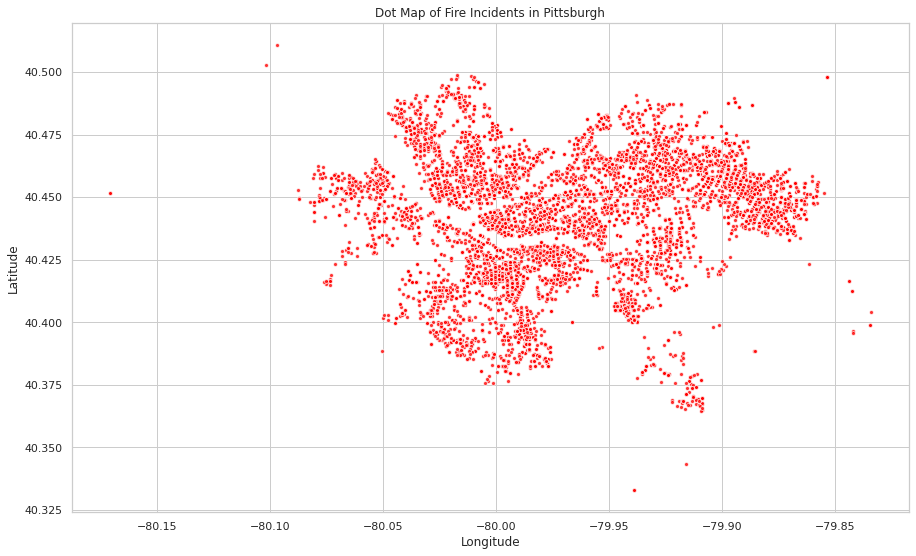

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(15, 9))
sns.scatterplot(x='longitude', y='latitude', data=cleaned_fire_data, s=15, color='red', alpha=0.8)
plt.title('Dot Map of Fire Incidents in Pittsburgh')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The dot map above visualizes the fire incidents in Pittsburgh, with each dot representing an incident. This map provides a spatial distribution of fire incidents across the city.

After that, count the number of fire incidents in each neighborhood and merging this data with the population data.

In [7]:
fire_incidents_per_neighborhood = cleaned_fire_data['neighborhood'].value_counts().reset_index()
fire_incidents_per_neighborhood.columns = ['Neighborhood', 'Fire_Incidents']

merged_data = pd.merge(fire_incidents_per_neighborhood, population_data, on='Neighborhood', how='left')



We use the rate of fire incidents per 1000 people in 2020 to determine which neighborhood has the lowest fire rate.

In [8]:
merged_data['Incidents_per_1000'] = (merged_data['Fire_Incidents'] / merged_data['2020_Total_Population']) * 1000

sorted_data = merged_data.sort_values(by='Incidents_per_1000', ascending=False)

final_data = sorted_data[['Neighborhood', 'Fire_Incidents', '2020_Total_Population', 'Incidents_per_1000']]

final_data

,Neighborhood,Fire_Incidents,2020_Total_Population,Incidents_per_1000
63,Chateau,41,19.0,2157.894737
73,South Shore,23,29.0,793.103448
46,North Shore,63,301.0,209.302326
76,West End,22,205.0,107.317073
50,Homewood West,59,642.0,91.900312
...,...,...,...,...
1,Central Business District,263,NaN,NaN
34,Spring Hill-City View,101,NaN,NaN
57,Arlington,51,NaN,NaN
84,Arlington Heights,13,NaN,NaN


Sort the data by the rate of incidents per 1000, from lowest to highest, only display top 10.

In [9]:
sorted_data_ascending = final_data.sort_values(by='Incidents_per_1000', ascending=True)

sorted_data_ascending.head(10)

,Neighborhood,Fire_Incidents,2020_Total_Population,Incidents_per_1000
69,Westwood,27,3332.0,8.103241
89,Regent Square,9,971.0,9.268795
67,Morningside,32,3252.0,9.840098
21,Squirrel Hill North,130,11879.0,10.943682
82,Swisshelm Park,15,1339.0,11.202390
25,North Oakland,124,10691.0,11.598541
10,Shadyside,181,15317.0,11.816935
41,Highland Park,76,6235.0,12.189254
85,Oakwood,13,1025.0,12.682927
53,Stanton Heights,57,4427.0,12.875536


#### Visualization 

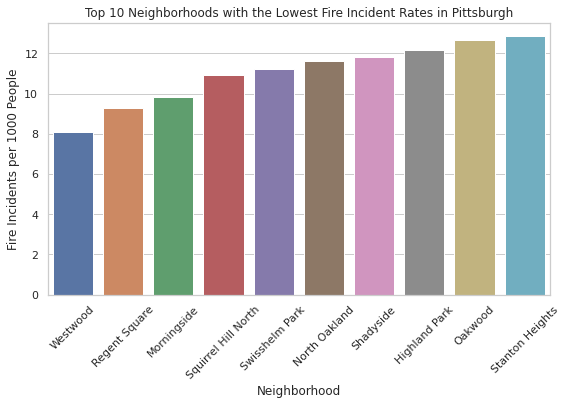

In [11]:
lowest_fire_rate_neighborhoods = sorted_data_ascending.head(10)

plt.figure(figsize=(9, 5))
sns.barplot(x='Neighborhood', y='Incidents_per_1000', data=lowest_fire_rate_neighborhoods)
plt.title('Top 10 Neighborhoods with the Lowest Fire Incident Rates in Pittsburgh')
plt.xlabel('Neighborhood')
plt.ylabel('Fire Incidents per 1000 People')
plt.xticks(rotation=45)
plt.show()

### Education/Enrollment

We chose this metric because an educated community is important for a neighborhood. We measured education in neighborhoods by the percent of the total population that are enrolled in pre-grade 12. I was thinking in the perspective of someone with children. Being in a neighborhood with many other educated kids will put your child in an academic-oriented environment, fostering success. 

datasets: 

https://data.wprdc.org/dataset/pittsburgh-public-schools-enrollment

https://data.wprdc.org/dataset/2020-census-redistricting-data-extracts



In [3]:
enrollment = pd.read_csv("neighborhood_enrollment.csv")
enrollment = enrollment.fillna(0)
enrollment = enrollment.groupby('Neighborhood', as_index=False).sum()
enrollment.head()

,Neighborhood,african_american,american_indian,asian__not_pacific_islander,hispanic,multiracial,native_hawaiian_or_other_pacific_islander,white,total_students_enrolled,attending_feeder,attending_nonfeeder,total_with_feeder_status
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Allegheny Center,69.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,28.0,11.0,80.0
2,Allegheny West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Allentown,187.0,0.0,0.0,0.0,28.0,0.0,46.0,284.0,168.0,116.0,284.0
4,Arlington,94.0,0.0,0.0,0.0,0.0,0.0,61.0,183.0,101.0,82.0,183.0


These are data entries from the census data of Pittsburgh.

In [4]:
population=pd.read_csv("preliminarycitypittsburghneighborhood_pl94171summary-2.csv")
population.head()

,Neighborhood,2010_Total_Population,2010_OneRace_Population,2010_White_Alone_Population,2010_Black_Alone_Population,2010_American_Indian_and_Alaska_Native_alone_population,2010_Asian_Alone_Population,2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population,2010_Any_other_single_race_alone_Popualtion,2010_Population_two_or_more_races,...,Change_2010_to_2020_Total_Population,Change_2010_to_2020_OneRace_Population,Change_2010_to_2020_White_Alone_Population,Change_2010_to_2020_Black_Alone_Population,Change_2010_to_2020_American_Indian_and_Alaska_Native_alone_population,Change_2010_to_2020_Asian_Alone_Population,Change_2010_to_2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population,Change_2010_to_2020_Any_other_single_race_alone_Popualtion,Change_2010_to_2020_Population_two_or_more_races,Change_2010_to_2020_Hispanic_or_Latino_Population
0,Allegheny Center,933,896,381,453,4,56,1,1,37,...,486,441,302,-63,4,179,0,19,45,23
1,Allegheny West,462,448,354,84,1,7,0,2,14,...,78,45,72,-52,0,9,1,15,33,28
2,Allentown,2500,2384,1485,878,9,1,0,11,116,...,-195,-258,-213,-93,-6,18,6,30,63,23
3,Arlington - Arlington Heights (Combined),2113,2042,1452,576,9,3,0,2,71,...,-73,-153,-246,44,-4,9,0,44,80,39
4,Banksville,4144,4053,3651,169,2,211,0,20,91,...,-17,-197,-460,25,5,174,2,57,180,102


Here, I combine the two data sets by the Neighborhood column

In [10]:
enrollment=pd.merge(enrollment, population, on="Neighborhood")
enrollment.head()

,Neighborhood,african_american,american_indian,asian__not_pacific_islander,hispanic,multiracial,native_hawaiian_or_other_pacific_islander,white,total_students_enrolled,attending_feeder,...,Change_2010_to_2020_Total_Population,Change_2010_to_2020_OneRace_Population,Change_2010_to_2020_White_Alone_Population,Change_2010_to_2020_Black_Alone_Population,Change_2010_to_2020_American_Indian_and_Alaska_Native_alone_population,Change_2010_to_2020_Asian_Alone_Population,Change_2010_to_2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population,Change_2010_to_2020_Any_other_single_race_alone_Popualtion,Change_2010_to_2020_Population_two_or_more_races,Change_2010_to_2020_Hispanic_or_Latino_Population
0,Allegheny Center,69.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,28.0,...,486,441,302,-63,4,179,0,19,45,23
1,Allegheny West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,78,45,72,-52,0,9,1,15,33,28
2,Allentown,187.0,0.0,0.0,0.0,28.0,0.0,46.0,284.0,168.0,...,-195,-258,-213,-93,-6,18,6,30,63,23
3,Banksville,0.0,0.0,22.0,0.0,11.0,0.0,96.0,170.0,118.0,...,-17,-197,-460,25,5,174,2,57,180,102
4,Bedford Dwellings,213.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,119.0,...,184,161,3,156,2,0,0,0,23,6


Here, I add a new column, "total_students_enrolled_per_capita" because a potential confounding variable could be the size of the neighborhoods, so we take this into account by taking the proportion of students who are enrolled instead of the number of students enrolled.

In [12]:
enrollment = enrollment[["Neighborhood","total_students_enrolled","2020_Total_Population"]]
myList = []
for index, row in enrollment.iterrows():
    myList.append(row["total_students_enrolled"]/row["2020_Total_Population"])
enrollment["total_students_enrolled_per_capita"]=myList
enrollment=enrollment.sort_values(by=["total_students_enrolled_per_capita"], ascending=False)
enrollment.head()

,Neighborhood,total_students_enrolled,2020_Total_Population,total_students_enrolled_per_capita
52,Northview Heights,527.0,1769,0.297908
37,Homewood North,589.0,2617,0.225067
38,Homewood South,477.0,2260,0.211062
24,East Hills,569.0,2892,0.196750
39,Homewood West,118.0,642,0.183801


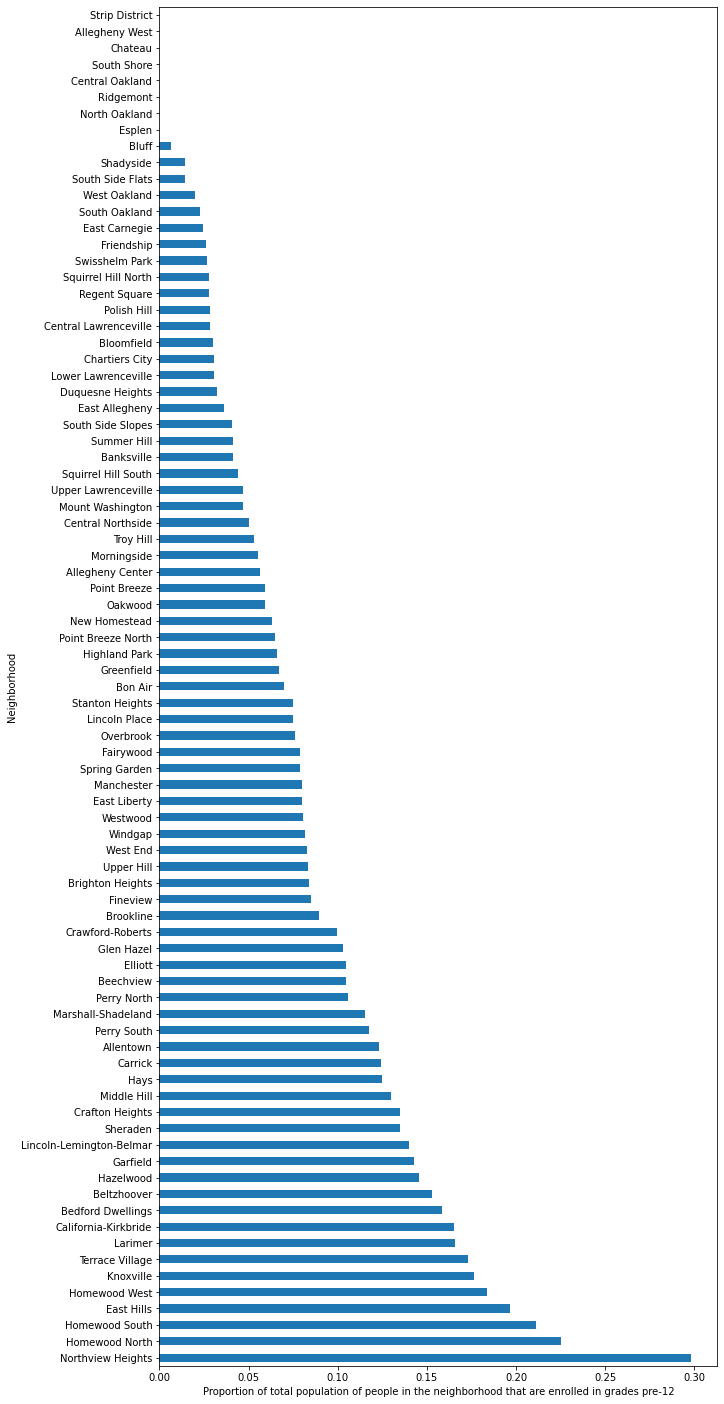

In [13]:
graph=enrollment.plot.barh(x='Neighborhood', y='total_students_enrolled_per_capita', figsize=(10, 25), legend=None, rot=0)
graph.set_xlabel("Proportion of total population of people in the neighborhood that are enrolled in grades pre-12")
graph

Northview Heights is the best neighborhood by this submetric with just under 30 percent of the neighborhood population being enrolled in grades pre-12. 

# Conclusions

David
* If I had to pick a favorite neighborhood in the list, I guess I would say Squirrel Hill South since it has some good places to eat like Waffelonia and Everyday Noodle. I'm not too surprised it did well since people often say a bunch of rich people live there. SS doesn't surprise me either since they have a private school.


Joe
* My favourite neighborhood in Pittsburgh is Shadyside. Although Shadyside isn't the best when we are considering fire incidents rate, but it is good enough to get into top 10 of the rank. With all kinds of facility inside and traffic convenience, Shadyside is Undoubtedly one of the best neighborhood in Pittsburgh.

Leo
* Combinining all three of these submetrics into one metric to find the best neighborhood in Pittsburgh results in Carrick being the best neighborhood. It scores in the top percentage for all three submetrics.